In [1]:
#4.1  "Create 3 clusters as below.
#1. Sensitive Area's
#2. Moderate Area's
#3. Peaceful Area's"
#4.2  Create DataFrame for each cluster that shows data according to the areas.
#4.3  "Analyse your clusters and prepare a report that explains all your observations.
#Example - 
#1. What is impacting more crimes in sensitive areas. 
#2. What needs to be done to reduce crime. 
#3. Most safe and unsafe districts.
#4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"
#4.4   Capstone project overall story in your own words. Min 1000 words.

# Statewise crime data analysis for the year 2020 based on the data extracted from National crime bureau website

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
data=pd.read_excel(r"C:\Users\asus 1\Desktop\Fliprobo\Crimes in India\17016833111DistrictwiseIPCCrimes2022.xlsx")

In [4]:
data.head()

,S.no,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft
0,1,Andhra Pradesh,Alluri Sitharama Raju,29,5,34,46
1,2,Andhra Pradesh,Anakapalli,16,26,37,264
2,3,Andhra Pradesh,Anantapuramu,51,31,12,405
3,4,Andhra Pradesh,Annamayya,37,10,11,275
4,5,Andhra Pradesh,Bapatla,42,15,22,391


In [5]:
data.drop(['S.no'], axis=1, inplace=True)

In [6]:
data.shape

(934, 6)

In [7]:
data['Total_crimes']= data['Murder']+data['Kidnapping and Abduction']+data['Rape']+data['Theft']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UT                  934 non-null    object
 1   District                  934 non-null    object
 2   Murder                    934 non-null    int64 
 3   Kidnapping and Abduction  934 non-null    int64 
 4   Rape                      934 non-null    int64 
 5   Theft                     934 non-null    int64 
 6   Total_crimes              934 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 51.2+ KB


In [9]:
data.isnull().sum()

State/UT                    0
District                    0
Murder                      0
Kidnapping and Abduction    0
Rape                        0
Theft                       0
Total_crimes                0
dtype: int64

In [10]:
data.describe()

,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes
count,934.000000,934.000000,934.000000,934.00000,934.000000
mean,30.537473,115.190578,33.743041,698.85546,878.326552
std,28.753082,158.570659,45.274870,1993.06392,2103.523567
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.000000,12.250000,6.000000,85.00000,144.250000
50%,25.000000,51.000000,18.000000,237.50000,381.500000
75%,43.000000,156.000000,43.000000,541.75000,799.750000
max,307.000000,1754.000000,370.000000,19364.00000,20135.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UT                  934 non-null    object
 1   District                  934 non-null    object
 2   Murder                    934 non-null    int64 
 3   Kidnapping and Abduction  934 non-null    int64 
 4   Rape                      934 non-null    int64 
 5   Theft                     934 non-null    int64 
 6   Total_crimes              934 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 51.2+ KB


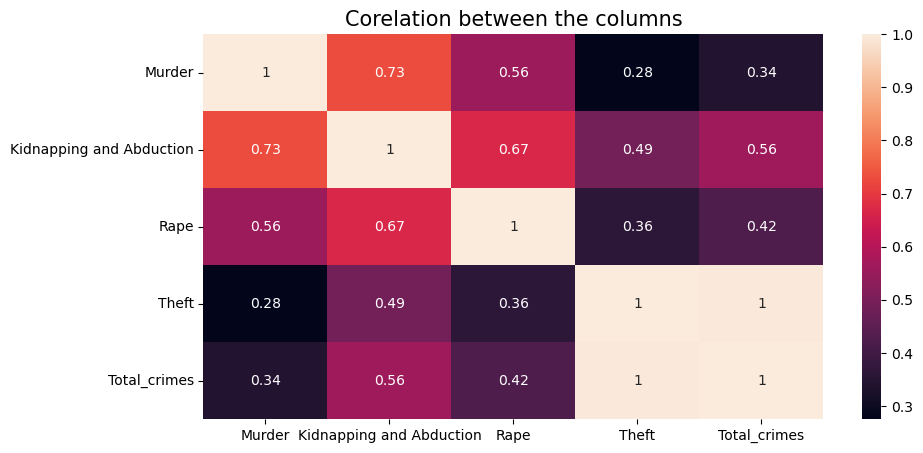

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.title('Corelation between the columns', fontsize=15)
plt.show()

In [13]:
column=data.columns[2:]
column

Index(['Murder', 'Kidnapping and Abduction', 'Rape', 'Theft', 'Total_crimes'], dtype='object')

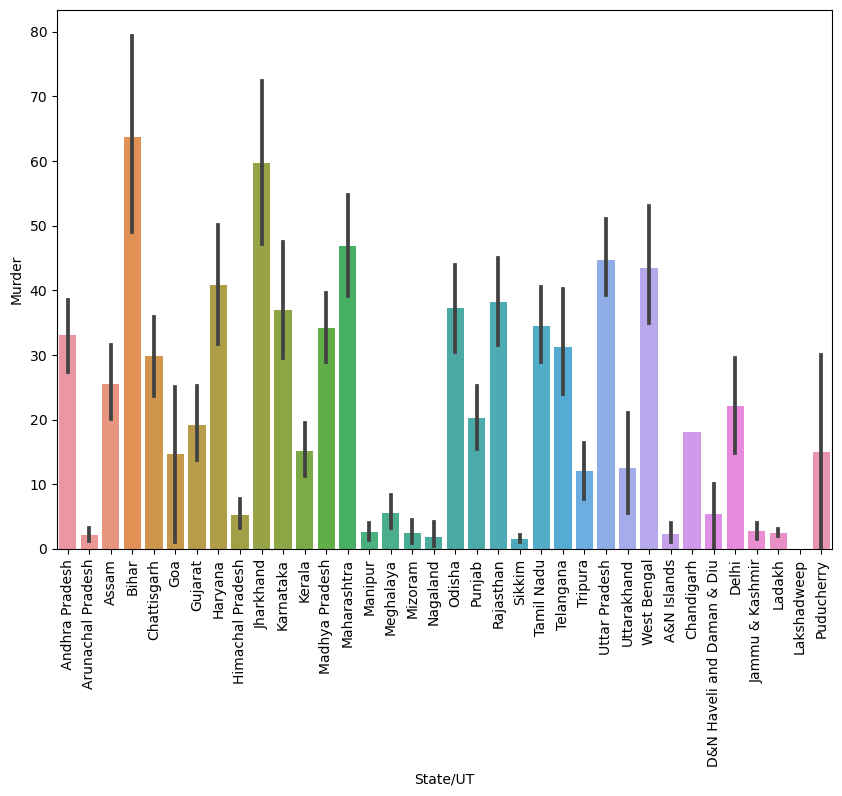

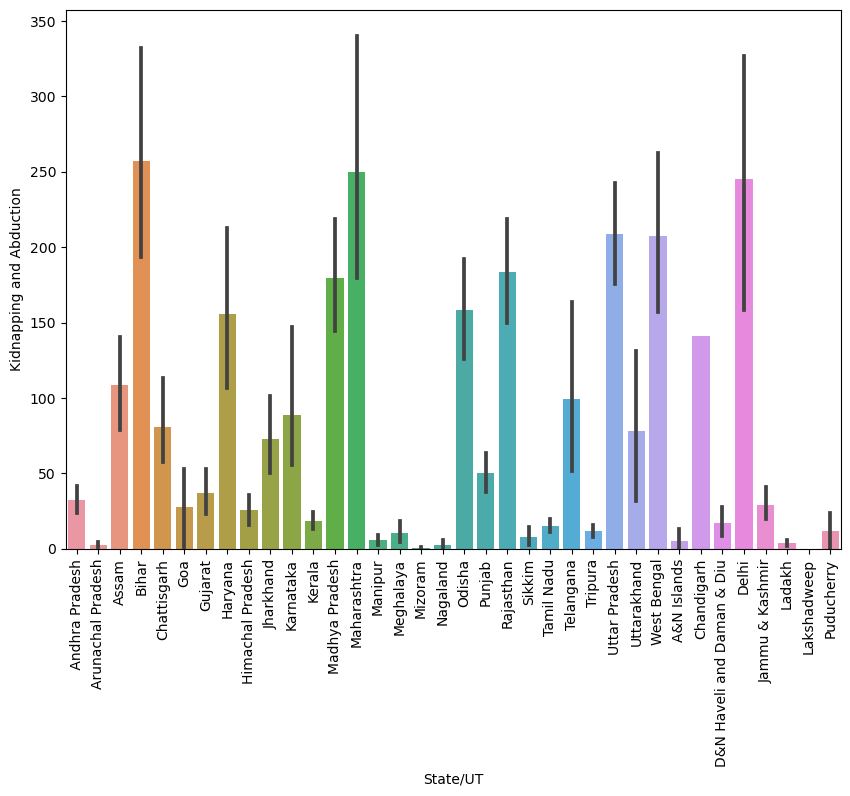

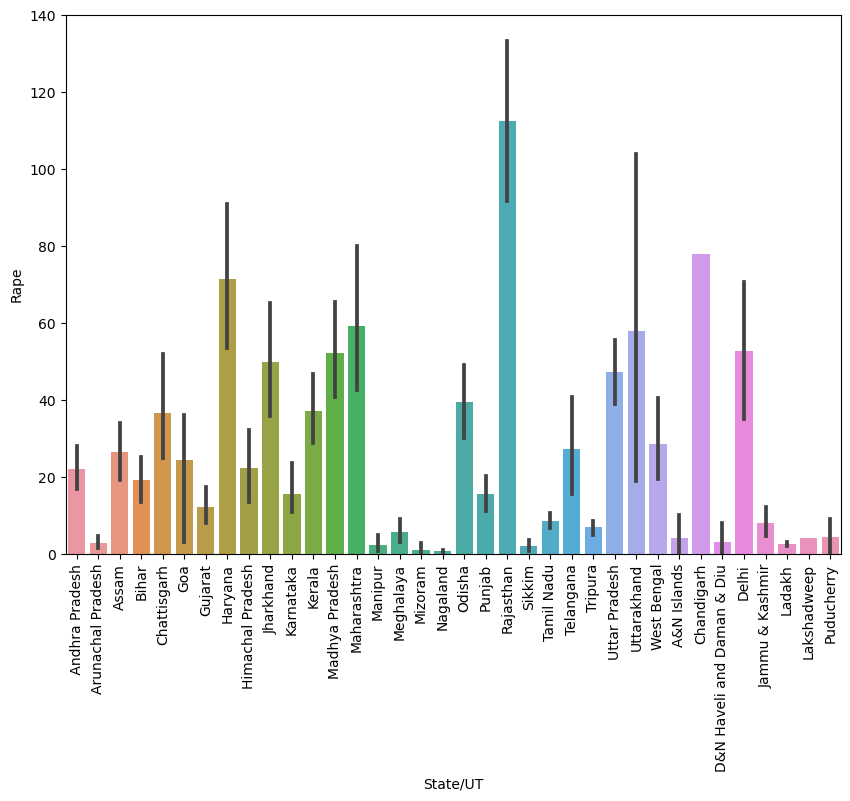

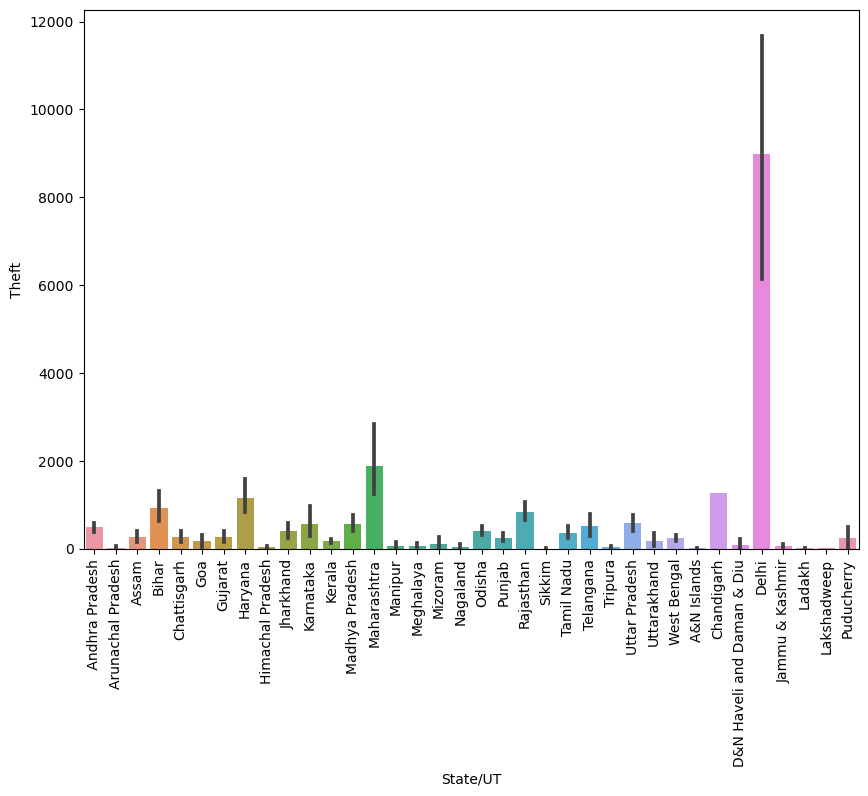

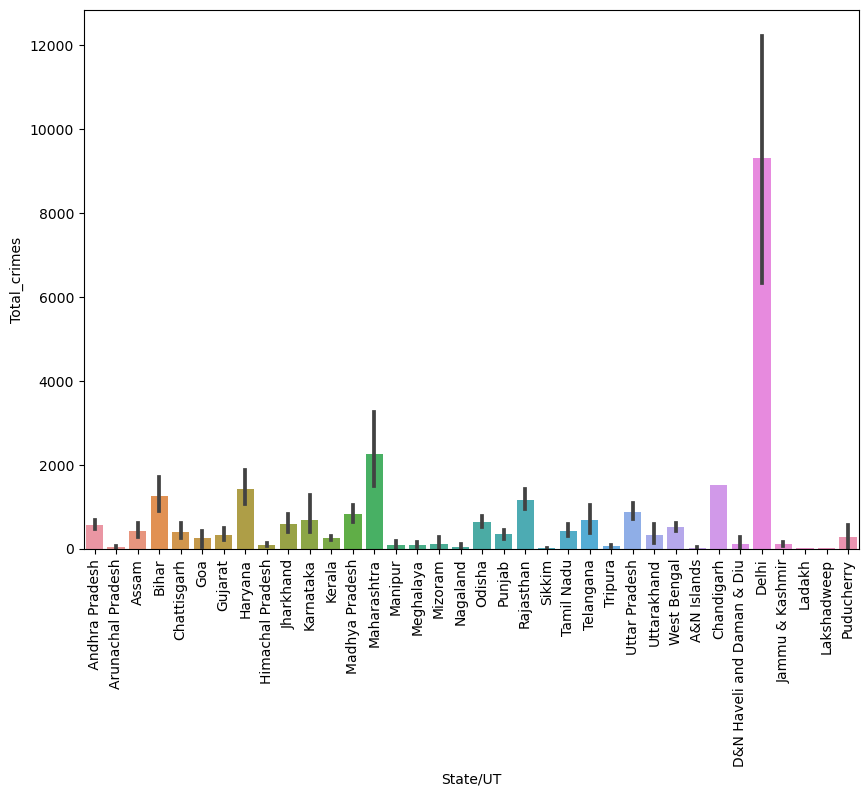

In [14]:
for i in column:
    plt.figure(figsize=(10, 7))
    sns.barplot(x='State/UT',y=i, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [15]:
features=['Murder', 'Kidnapping and Abduction', 'Rape', 'Theft']
df=data[features]
df.head()

,Murder,Kidnapping and Abduction,Rape,Theft
0,29,5,34,46
1,16,26,37,264
2,51,31,12,405
3,37,10,11,275
4,42,15,22,391


In [16]:
df.describe()

,Murder,Kidnapping and Abduction,Rape,Theft
count,934.000000,934.000000,934.000000,934.00000
mean,30.537473,115.190578,33.743041,698.85546
std,28.753082,158.570659,45.274870,1993.06392
min,0.000000,0.000000,0.000000,0.00000
25%,8.000000,12.250000,6.000000,85.00000
50%,25.000000,51.000000,18.000000,237.50000
75%,43.000000,156.000000,43.000000,541.75000
max,307.000000,1754.000000,370.000000,19364.00000


In [17]:
#Scaling the data to standardize values
scaler = MinMaxScaler()
scaler.fit(df)
s_df = scaler.transform(df)
s_df

array([[0.09446254, 0.00285063, 0.09189189, 0.00237554],
       [0.05211726, 0.01482326, 0.1       , 0.01363355],
       [0.16612378, 0.01767389, 0.03243243, 0.0209151 ],
       ...,
       [0.        , 0.        , 0.01081081, 0.00072299],
       [0.        , 0.        , 0.        , 0.        ],
       [0.09771987, 0.01368301, 0.02432432, 0.02607932]])

In [18]:
my_df=pd.DataFrame(np.array(s_df), columns=features)
print(my_df)

       Murder  Kidnapping and Abduction      Rape     Theft
0    0.094463                  0.002851  0.091892  0.002376
1    0.052117                  0.014823  0.100000  0.013634
2    0.166124                  0.017674  0.032432  0.020915
3    0.120521                  0.005701  0.029730  0.014202
4    0.136808                  0.008552  0.059459  0.020192
..        ...                       ...       ...       ...
929  0.006515                  0.003421  0.005405  0.000671
930  0.009772                  0.001140  0.008108  0.000361
931  0.000000                  0.000000  0.010811  0.000723
932  0.000000                  0.000000  0.000000  0.000000
933  0.097720                  0.013683  0.024324  0.026079

[934 rows x 4 columns]


In [19]:
my_df.describe()

,Murder,Kidnapping and Abduction,Rape,Theft
count,934.000000,934.000000,934.000000,934.000000
mean,0.099471,0.065673,0.091197,0.036090
std,0.093658,0.090405,0.122365,0.102926
min,0.000000,0.000000,0.000000,0.000000
25%,0.026059,0.006984,0.016216,0.004390
50%,0.081433,0.029076,0.048649,0.012265
75%,0.140065,0.088940,0.116216,0.027977
max,1.000000,1.000000,1.000000,1.000000


In [20]:
my_df.head()

,Murder,Kidnapping and Abduction,Rape,Theft
0,0.094463,0.002851,0.091892,0.002376
1,0.052117,0.014823,0.100000,0.013634
2,0.166124,0.017674,0.032432,0.020915
3,0.120521,0.005701,0.029730,0.014202
4,0.136808,0.008552,0.059459,0.020192


In [21]:
from sklearn.cluster import KMeans

In [22]:
sse = []
k_rng=range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(my_df)
    sse.append(kmeans.inertia_)

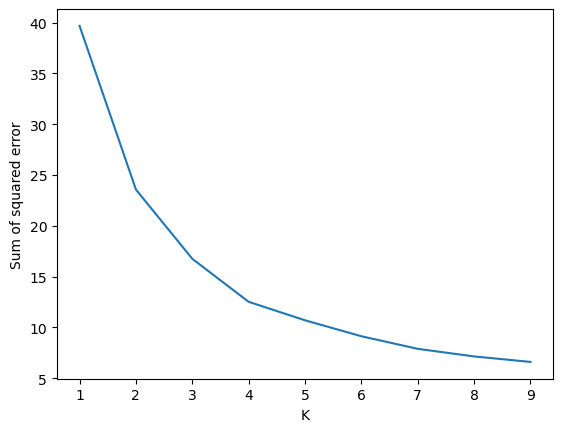

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [24]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


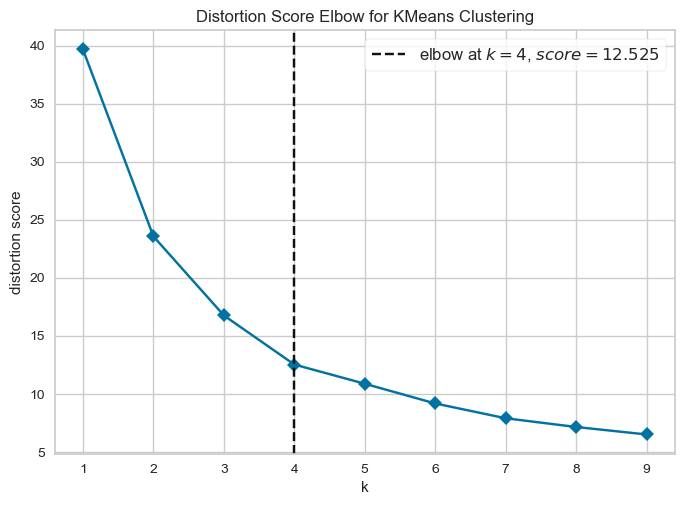

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
#finding the number of clusters using yellowbrick visualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(my_df)
visualizer.show()

In [26]:
#Ananlysis by dividing the District into 3 clusters

In [27]:
kmeans = KMeans(3)
kmeans.fit(my_df)

KMeans(n_clusters=3)

In [28]:
#MEthod 1 : clustering using centroids

In [29]:
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids

,Murder,Kidnapping and Abduction,Rape,Theft
0,0.214586,0.173948,0.260871,0.062007
1,0.068802,0.033543,0.045561,0.013978
2,0.210194,0.312160,0.273132,0.720309


In [30]:
cen=centroids.T
cen

,0,1,2
Murder,0.214586,0.068802,0.210194
Kidnapping and Abduction,0.173948,0.033543,0.312160
Rape,0.260871,0.045561,0.273132
Theft,0.062007,0.013978,0.720309


In [31]:
def get_labels(my_df, cen):
    distances = cen.apply(lambda x: np.sqrt(((df-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [32]:
labels=get_labels(my_df, cen)

In [33]:
labels.value_counts()

2    877
1     54
0      3
dtype: int64

In [34]:
#Method 2: Using PCA

In [35]:
pca=PCA()
X=pca.fit_transform(my_df)

In [36]:
kmeans=KMeans(3)
label=kmeans.fit_predict(X)
unique_labels=np.unique(label)
unique_labels

array([0, 1, 2])

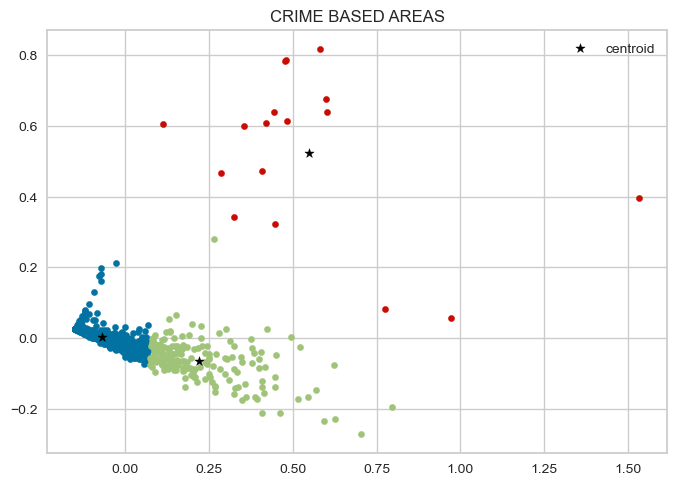

In [37]:
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1], s=20)
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
    
plt.legend()
plt.title('CRIME BASED AREAS')
plt.show()

In [38]:
label=pd.DataFrame(np.array(label))
print(label)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
929  0
930  0
931  0
932  0
933  0

[934 rows x 1 columns]


In [39]:
label.value_counts()

0    730
1    187
2     17
dtype: int64

In [40]:
data['Cluster']=label

In [41]:
data.head()

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
0,Andhra Pradesh,Alluri Sitharama Raju,29,5,34,46,114,0
1,Andhra Pradesh,Anakapalli,16,26,37,264,343,0
2,Andhra Pradesh,Anantapuramu,51,31,12,405,499,0
3,Andhra Pradesh,Annamayya,37,10,11,275,333,0
4,Andhra Pradesh,Bapatla,42,15,22,391,470,0


In [42]:
data.tail(50)

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
884,Delhi,South-West,18,332,84,7461,7895,1
885,Delhi,Spl Cell,0,0,0,0,0,0
886,Delhi,SPUWAC,0,0,0,0,0,0
887,Delhi,Vigilance,0,0,0,0,0,0
888,Delhi,West,31,312,76,18360,18779,2
889,Delhi,Rohini,43,408,82,12058,12591,2
890,Delhi,Shahdara,16,270,67,11122,11475,2
891,Delhi,Dwarka,30,460,145,16581,17216,2
892,Delhi,Outer North,57,730,76,9044,9907,2
893,Jammu & Kashmir,Anantnag,5,69,19,134,227,0


In [43]:
Moderate_area=data[data['Cluster']==0]
Moderate_area

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
0,Andhra Pradesh,Alluri Sitharama Raju,29,5,34,46,114,0
1,Andhra Pradesh,Anakapalli,16,26,37,264,343,0
2,Andhra Pradesh,Anantapuramu,51,31,12,405,499,0
3,Andhra Pradesh,Annamayya,37,10,11,275,333,0
4,Andhra Pradesh,Bapatla,42,15,22,391,470,0
...,...,...,...,...,...,...,...,...
929,Ladakh,Kargil,2,6,2,13,23,0
930,Ladakh,Leh,3,2,3,7,15,0
931,Lakshadweep,Lakshadweep,0,0,4,14,18,0
932,Puducherry,Karaikal,0,0,0,0,0,0


In [44]:
Moderate_area.describe()

,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.0
mean,20.794521,57.072603,16.671233,263.682192,358.220548,0.0
std,17.958540,67.664357,16.760031,390.890760,422.062448,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,5.250000,3.000000,47.000000,83.250000,0.0
50%,18.000000,34.000000,11.000000,159.500000,259.500000,0.0
75%,32.000000,84.000000,26.000000,317.000000,489.500000,0.0
max,90.000000,452.000000,97.000000,4387.000000,4424.000000,0.0


In [51]:
Moderate_area.sort_values('Total_crimes', ascending=False)

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
758,Uttar Pradesh,GRP,16,16,5,4387,4424,0
875,Delhi,Metro,1,5,1,3729,3736,0
462,Maharashtra,Aurangabad Railway,4,3,1,3455,3463,0
366,Madhya Pradesh,Bhopal Railway,1,9,1,3278,3289,0
881,Delhi,RAILWAY,7,14,1,3089,3111,0
...,...,...,...,...,...,...,...,...
631,Rajasthan,Jaipur Metro,0,0,0,0,0,0
635,Rajasthan,Jaipur Crime,0,0,0,0,0,0
684,Tamil Nadu,Other Units,0,0,0,0,0,0
683,Tamil Nadu,Cyber Cell,0,0,0,0,0,0


In [53]:
Peaceful_Area=data[data['Cluster']==1]
Peaceful_Area

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
60,Assam,Cachar,60,282,45,947,1334,1
69,Assam,Guwahati City,74,379,62,2832,3347,1
73,Assam,Kamrup,50,262,98,573,983,1
80,Assam,Nagaon,58,192,65,569,884,1
86,Assam,Sonitpur,62,421,68,261,812,1
...,...,...,...,...,...,...,...,...
849,West Bengal,Baruipur Police,96,498,68,305,967,1
853,West Bengal,Purba Bardhaman,69,393,31,227,720,1
856,West Bengal,Basirhat,37,417,50,99,603,1
860,West Bengal,Krishnagar,74,412,72,196,754,1


In [54]:
Peaceful_Area.describe()

,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.0
mean,65.481283,302.764706,94.267380,1193.187166,1655.700535,1.0
std,26.287971,162.152020,58.492837,1011.769036,1100.059913,0.0
min,12.000000,28.000000,7.000000,99.000000,375.000000,1.0
25%,46.000000,173.500000,52.000000,455.000000,889.000000,1.0
50%,60.000000,263.000000,78.000000,945.000000,1334.000000,1.0
75%,81.500000,411.500000,120.000000,1640.500000,2180.000000,1.0
max,154.000000,1003.000000,305.000000,7461.000000,7895.000000,1.0


In [56]:
Peaceful_Area.sort_values('Total_crimes', ascending=False)

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
884,Delhi,South-West,18,332,84,7461,7895,1
235,Haryana,Gurugram,90,286,191,4969,5536,1
415,Maharashtra,Ahmednagar,94,580,112,4043,4829,1
379,Madhya Pradesh,Indore Commissionarate,72,674,174,3745,4665,1
760,Uttar Pradesh,Ghaziabad,107,124,103,4048,4382,1
...,...,...,...,...,...,...,...,...
602,Rajasthan,Dungarpur,44,265,59,130,498,1
278,Jharkhand,Garhwa,87,113,36,197,433,1
281,Jharkhand,Gumla,86,50,106,189,431,1
156,Chattisgarh,Jashpur,64,60,65,200,389,1


In [47]:
sensitive_area=data[data['Cluster']==2]
sensitive_area

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
128,Bihar,Patna,307,1332,85,8341,10065,2
298,Karnataka,Bengaluru City,173,946,151,7574,8844,2
433,Maharashtra,Mumbai Commr.,135,1754,370,17876,20135,2
434,Maharashtra,Mumbai Railway,6,20,1,12589,12616,2
870,Delhi,Central,22,219,111,9370,9722,2
872,Delhi,East,36,292,82,14828,15238,2
877,Delhi,North,37,326,49,14023,14435,2
878,Delhi,North-East,44,556,76,19364,20040,2
879,Delhi,North-West,44,310,67,18480,18901,2
880,Delhi,Outer,33,483,65,15120,15701,2


In [48]:
sensitive_area.describe()

,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,64.529412,547.529412,101.058824,13948.058824,14661.176471,2.0
std,75.176557,433.660743,77.665525,3842.392069,3820.063469,0.0
min,6.000000,20.000000,1.000000,7574.000000,8844.000000,2.0
25%,31.000000,310.000000,67.000000,11122.000000,11475.000000,2.0
50%,40.000000,408.000000,82.000000,14828.000000,15238.000000,2.0
75%,44.000000,556.000000,111.000000,17144.000000,17798.000000,2.0
max,307.000000,1754.000000,370.000000,19364.000000,20135.000000,2.0


In [57]:
sensitive_area.sort_values('Total_crimes', ascending=False)

,State/UT,District,Murder,Kidnapping and Abduction,Rape,Theft,Total_crimes,Cluster
433,Maharashtra,Mumbai Commr.,135,1754,370,17876,20135,2
878,Delhi,North-East,44,556,76,19364,20040,2
879,Delhi,North-West,44,310,67,18480,18901,2
888,Delhi,West,31,312,76,18360,18779,2
883,Delhi,South-East,43,490,121,17144,17798,2
891,Delhi,Dwarka,30,460,145,16581,17216,2
882,Delhi,South,40,400,94,15243,15777,2
880,Delhi,Outer,33,483,65,15120,15701,2
872,Delhi,East,36,292,82,14828,15238,2
877,Delhi,North,37,326,49,14023,14435,2


In [49]:
#By observing the above data it was found that there were 730 districts which can be considered as moderate areas, 187 as peaceful and 17 as sensitive areas wrt to the four major crimes taken into consideration. 

# Most safe and unsafe districts.



In [ ]:
# From the above data it was observed that the Chaibasa district in Jharkhand is the most safe district.
# From the above data it was observed that the Maharashtra Commr. district in Mumbai is the most unsafe district.